In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [3]:
train = pd.read_csv('/datasets/gold_recovery_train.csv')
test = pd.read_csv('/datasets/gold_recovery_test.csv')
full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [4]:
full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [6]:
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [8]:
test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [10]:
train.drop('date', axis=1, inplace=True)
test.drop('date', axis=1, inplace=True)
full.drop('date', axis=1, inplace=True)

In [11]:
test = test.merge(full, how='left')

Since we ultimately want to build a model, I identify here that date is not an important column and would interfere. Further, since our testing data lacks all the columns, I merge the test data with the full data. This way, we can properly build a model. 

In [12]:
r_true = train['rougher.output.recovery']

In [13]:
C = train['rougher.output.concentrate_au']
F = train['rougher.input.feed_au']
T = train['rougher.output.tail_au']

In [14]:
train['recovery'] = C * (F - T) / (F * (C - T)) * 100

In [15]:
mae = pd.np.sum(pd.np.abs(train['recovery']-r_true)) / len(r_true)

In [16]:
print(mae)

8.00350954615662e-15


In [17]:
full = full.fillna(method='ffill')

In [18]:
train = train.fillna(method='ffill')

In [19]:
test = test.fillna(method='ffill')

With the initial look at the data, I determined clearing NaN values from the data would result in too great a loss of valuable data. With that in mind, I instead filled in the null values by forward filling the data. In doing so, I was able to maintain the full dataset for analysis. 

Next, I looked to double check the rougher output feature, as I wanted to verify the data accuracy. It looks like we get a miniscule MAE, which suggests the data was calculated properly to begin with. 

# Step 2 - Data Analysis

In [20]:
ri_ag = full['rougher.input.feed_ag'].mean()
ri_pb = full['rougher.input.feed_pb'].mean()
ri_au = full['rougher.input.feed_au'].mean()
ro_ag = full['rougher.output.concentrate_ag'].mean()
ro_pb = full['rougher.output.concentrate_pb'].mean()
ro_au = full['rougher.output.concentrate_au'].mean()
fo_ag = full['final.output.concentrate_ag'].mean()
fo_pb = full['final.output.concentrate_pb'].mean()
fo_au = full['final.output.concentrate_au'].mean()

In [21]:
print('Mean Ag Rough Input: {:.2f}'.format(ri_ag))
print('Mean Ag Rough Output: {:.2f}'.format(ro_ag))
print('Mean Ag Final Output: {:.2f}'.format(fo_ag))

Mean Ag Rough Input: 8.04
Mean Ag Rough Output: 10.85
Mean Ag Final Output: 4.77


In [22]:
print('Mean Pb Rough Input: {:.2f}'.format(ri_pb))
print('Mean Pb Rough Output: {:.2f}'.format(ro_pb))
print('Mean Pb Final Output: {:.2f}'.format(fo_pb))

Mean Pb Rough Input: 3.28
Mean Pb Rough Output: 6.89
Mean Pb Final Output: 9.07


In [23]:
print('Mean Au Rough Input: {:.2f}'.format(ri_au))
print('Mean Au Rough Output: {:.2f}'.format(ro_au))
print('Mean Au Final Output: {:.2f}'.format(fo_au))

Mean Au Rough Input: 7.55
Mean Au Rough Output: 17.83
Mean Au Final Output: 39.89


Here we see how gold, lead, and silver change throughout the stages. Gold, as we would expect, increased during each stage, taking a solid majority by the end. However, lead also increased gradually, but in a much smaller proportion. Finally, silver increased initially, but the final output is almost cut in half. 

Next, we will compare the feed size to ensure out training vs. test data is correct. Otherwise, it could skew our model.

Text(0.5, 0, 'Feed Size')

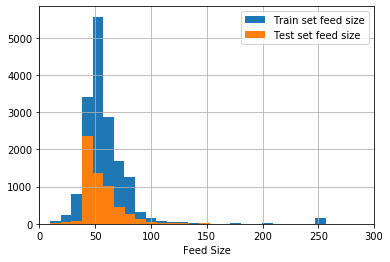

In [24]:
train['rougher.input.feed_size'].hist(bins=50, label='Train set feed size')
test['rougher.input.feed_size'].hist(bins=50, label='Test set feed size')
plt.legend()
plt.xlim(0,300)
plt.xlabel('Feed Size')

While there are some small differences, these are largely caused by the volume of data in the training vs. test set. As such, our data is similiar enough that we should be able to successfully model it. 

Next, we will have a closer look at total concerntrations across various stages of processing. 

In [25]:
full['rough_input_total'] = (full['rougher.input.feed_ag'] + full['rougher.input.feed_pb'] + 
                             full['rougher.input.feed_au'] + full['rougher.input.feed_sol'])

full['rough_output_total'] = (full['rougher.output.concentrate_ag'] + full['rougher.output.concentrate_pb'] + 
                              full['rougher.output.concentrate_au'] + full['rougher.output.concentrate_sol'])

full['final_output_total'] = (full['final.output.concentrate_ag'] + full['final.output.concentrate_pb'] + 
                              full['final.output.concentrate_au'] + full['final.output.concentrate_sol'])

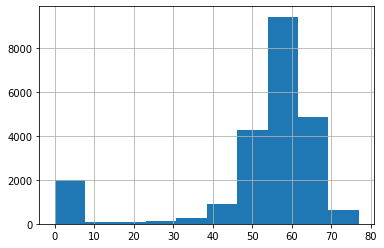

In [26]:
full['rough_input_total'].hist()

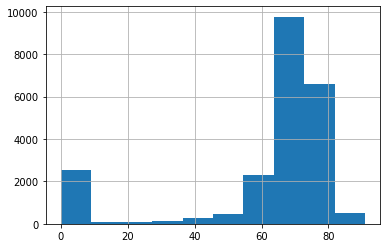

In [27]:
full['rough_output_total'].hist()

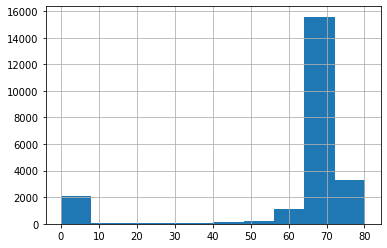

In [28]:
full['final_output_total'].hist()

In [29]:
len(full[full['rough_input_total'] <= 10])

2034

In [30]:
len(full[full['rough_output_total'] <= 10])

2527

In [31]:
len(full[full['final_output_total'] <= 10])

2127

In each stage, we notice a strange instance where the sum of our elements is than 40. This seems unusual. And, most unusual of all are the cases where we see 0-10 for the grand total. 

We'll need to investigate these cases and likely drop some data points. At first glance, the largest anomoly is among the rough output, where we find 2527 data points that have 10 or fewer as the total. It should be acceptable to drop these points.

Of course, we will need to do this independently with train/test data.

In [32]:
train['rough_input_total'] = (train['rougher.input.feed_ag'] + train['rougher.input.feed_pb'] + 
                             train['rougher.input.feed_au'] + train['rougher.input.feed_sol'])

train['rough_output_total'] = (train['rougher.output.concentrate_ag'] + train['rougher.output.concentrate_pb'] + 
                              train['rougher.output.concentrate_au'] + train['rougher.output.concentrate_sol'])

train['final_output_total'] = (train['final.output.concentrate_ag'] + train['final.output.concentrate_pb'] + 
                              train['final.output.concentrate_au'] + train['final.output.concentrate_sol'])

In [33]:
test['rough_input_total'] = (test['rougher.input.feed_ag'] + test['rougher.input.feed_pb'] + 
                             test['rougher.input.feed_au'] + test['rougher.input.feed_sol'])

test['rough_output_total'] = (test['rougher.output.concentrate_ag'] + test['rougher.output.concentrate_pb'] + 
                              test['rougher.output.concentrate_au'] + test['rougher.output.concentrate_sol'])

test['final_output_total'] = (test['final.output.concentrate_ag'] + test['final.output.concentrate_pb'] + 
                              test['final.output.concentrate_au'] + test['final.output.concentrate_sol'])

In [34]:
test = test[test['rough_input_total'] > 10]

In [35]:
test = test[test['rough_output_total'] > 10]

In [36]:
test = test[test['final_output_total'] > 10]

In [37]:
train = train[train['rough_output_total'] > 10]

In [38]:
train = train[train['rough_input_total'] > 10]

In [39]:
train = train[train['final_output_total'] > 10]

At this point, we have elminated the anamolous data. This should ensure we can better train our model, which is our next step. 

# Step 3 - Training the Model 

In [61]:
def smape(test, predict):
    return 100/len(test.astype(int)) * pd.np.sum(2 * pd.np.abs(predict.astype(int) - test.astype(int)) / (pd.np.abs(test.astype(int)) + pd.np.abs(predict.astype(int))))

def f_smape(test, predict):
    array = smape(test, predict)
    return (0.25 * array[0]) + (0.75 * array[1])

Before training any models, I am creating a formula to calculate sMAPE. This will be used as the evaluation statistic for our models. 

In [41]:
X = full.drop(columns=['rougher.output.recovery', 'final.output.recovery'])
y = full[['rougher.output.recovery', 'final.output.recovery']]

In [42]:
X_train = train.drop(columns=['rougher.output.recovery', 'final.output.recovery', 'recovery'])
y_train = train[['rougher.output.recovery', 'final.output.recovery']]

In [43]:
X_test = test.drop(columns=['rougher.output.recovery', 'final.output.recovery'])
y_test = test[['rougher.output.recovery', 'final.output.recovery']]

In [44]:
lreg = LinearRegression()
rfreg = RandomForestRegressor(random_state=47)

In [45]:
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
rfreg.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=47, verbose=0,
                      warm_start=False)

In [47]:
lpred = lreg.predict(X_test)

In [48]:
rfpred = rfreg.predict(X_test)

In [49]:
lreg_val = cross_val_score(lreg, X, y, cv=5, scoring='neg_mean_absolute_error')
print('Model Average Cross Evaluation Score:', lreg_val.mean())

Model Average Cross Evaluation Score: -8.925739019018575


In [50]:
smape_lreg = f_smape(y_test, lpred)
print(smape_lreg)

199.99997788825408


In [51]:
rfreg_val = cross_val_score(rfreg, X, y, cv=5, scoring='neg_mean_absolute_error')
print('Model Average Cross Evaluation Score:', rfreg_val.mean())

Model Average Cross Evaluation Score: -5.270847706464741


In [52]:
smape_rfreg = f_smape(y_test, rfpred)
print(smape_rfreg)

14.389302338922347


As you'll note above, I created simple models without any tuning to initially get an idea of what would work best. In this case, it seems random forest is much more efficient in evaluating this data. 

We see this efficiency in two ways. First, we looked at the mean absolute error for each model through cross-validation. This way, we get some idea of how much of an error we see when running through the full dataset. Second, we look at our more important metric -sMAPE. In this case, the significantly lower sMAPE score of our Random Forest model makes it the best bet. This, coupled with the lower MAE makes it the obvious choice. 

Of course, as a final step, we'll want to tune some model parameters to 

In [55]:
for estims in range(100, 1001, 100):
    model = RandomForestRegressor(random_state=47, n_estimators=estims)
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    mae = pd.np.sum(pd.np.abs(predict-y_test)) / len(y_test)
    print("n_estimators=", estims, ":", mae)

n_estimators= 100 : rougher.output.recovery     5.160643
final.output.recovery      12.054281
dtype: float64
n_estimators= 200 : rougher.output.recovery     4.517501
final.output.recovery      12.208170
dtype: float64
n_estimators= 300 : rougher.output.recovery     4.51266
final.output.recovery      12.56125
dtype: float64
n_estimators= 400 : rougher.output.recovery     4.520591
final.output.recovery      12.469254
dtype: float64
n_estimators= 500 : rougher.output.recovery     4.620292
final.output.recovery      11.620293
dtype: float64
n_estimators= 600 : rougher.output.recovery     4.944960
final.output.recovery      11.381167
dtype: float64
n_estimators= 700 : rougher.output.recovery     4.811459
final.output.recovery      11.684169
dtype: float64
n_estimators= 800 : rougher.output.recovery     4.780551
final.output.recovery      11.260945
dtype: float64
n_estimators= 900 : rougher.output.recovery     4.781261
final.output.recovery      11.559428
dtype: float64
n_estimators= 1000 : 

In [56]:
for depth in range(10, 101, 10):
    model = RandomForestRegressor(random_state=47, n_estimators=800, max_depth=depth)
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    mae = pd.np.sum(pd.np.abs(predict-y_test)) / len(y_test)
    print("max_depth=", depth, ":", mae)

max_depth= 10 : rougher.output.recovery     4.599865
final.output.recovery      11.055539
dtype: float64
max_depth= 20 : rougher.output.recovery     4.149794
final.output.recovery      10.909867
dtype: float64
max_depth= 30 : rougher.output.recovery     4.802453
final.output.recovery      11.288157
dtype: float64
max_depth= 40 : rougher.output.recovery     4.780551
final.output.recovery      11.260945
dtype: float64
max_depth= 50 : rougher.output.recovery     4.780551
final.output.recovery      11.260945
dtype: float64
max_depth= 60 : rougher.output.recovery     4.780551
final.output.recovery      11.260945
dtype: float64
max_depth= 70 : rougher.output.recovery     4.780551
final.output.recovery      11.260945
dtype: float64
max_depth= 80 : rougher.output.recovery     4.780551
final.output.recovery      11.260945
dtype: float64
max_depth= 90 : rougher.output.recovery     4.780551
final.output.recovery      11.260945
dtype: float64
max_depth= 100 : rougher.output.recovery     4.780551
f

In [57]:
model = RandomForestRegressor(random_state=47, n_estimators=800, max_depth=40)
model.fit(X_train, y_train)
predict_test = model.predict(X_test)

In [62]:
smape = f_smape(y_test, predict_test)
print(smape)

13.288421491190608


Thanks to hyperparameter tuning, we are able to build a random forest regressor with 800 estimates and a max depth of 40. It seems going beyond that does nothing to improve the metrics.  

This most effective model gives us an sMAPE of 13.29. 

With this, we can use our model to predict with considerable accuracy. 